<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/68_Day_K_Means_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [527]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs



In [528]:
centroids=[(-5,-5),(5,-5),(3,4)]
std=[1,1,1]

In [529]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=centroids,cluster_std=std)
X

array([[ 3.48219709, -5.37224346],
       [ 4.10527439,  5.63568194],
       [ 2.83895889,  1.8579674 ],
       ...,
       [ 0.69191067,  4.15764046],
       [ 5.46115781, -4.31403525],
       [-5.64458468, -5.43630374]])

In [530]:
import random

# class of K-Means fron scratch

In [531]:
class k_means:
   def __init__(self,n_clusters=2,max_iter=100):
    self.n_clusters=n_clusters
    self.max_iter=max_iter
    self.centroids=None

   def fit_pred(self,X):
     # intilize centroids
     row_index=np.random.randint(0,X.shape[0],self.n_clusters) # select random rows 1row=1point
     self.centroids = X[row_index]

     for i in range(self.max_iter):
      # assign clusters
      cluster_group=self.assign_cluster(X)
      # move centroids
      old_centroids=self.centroids
      self.centroids=self.move_centriod(X,cluster_group)
      # finsih
      if np.allclose(old_centroids,self.centroids):
        break
     return np.array(cluster_group)

   def move_centriod(Self,X,cluster_group):
      new_centreroid=[] # list

      type=np.unique(cluster_group)
      for k in type:
        new_centre=np.mean(X[cluster_group==k],axis=0) # collect all values which assign as 0
        new_centreroid.append(new_centre)

      return new_centreroid

   def assign_cluster(self,X):
        assign_c=[]

        # calculate distance
        for j in range(X.shape[0]):
          distance = np.sqrt(np.sum((X[j] - self.centroids)**2, axis=1)) # it give array of size =centriods , distance of a point j from all centriods

          index=np.argmin(distance) # give index of minimum distance
          assign_c.append(index)

        return assign_c


In [532]:
km=k_means(n_clusters=3)
y_pred=km.fit_pred(X)

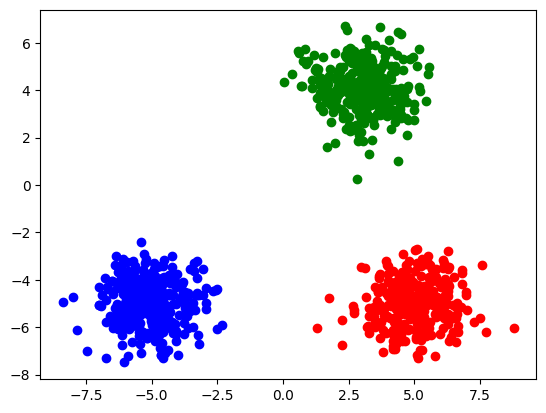

In [533]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='red')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='blue')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],c='green')